In [24]:
N = 3
arr = [[2,1,-1,8],
       [-3,-1,2,-11],
       [-2,1,2,-3]]

In [25]:
print(N)
def print_arr(arr):
    for i in range(N):
        print(arr[i])
print_arr(arr)

3
[2, 1, -1, 8]
[-3, -1, 2, -11]
[-2, 1, 2, -3]


In [27]:
def gauss_jordan(arr, N):
    for i in range(N):
        for j in range(N):
            if i != j:
                p = arr[j][i] / arr[i][i]
                for k in range(N+1):
                    arr[j][k] -= arr[i][k] * p
        print_arr(arr)
        print()

    for i in range(N):
        print(arr[i][3]/arr[i][i])

gauss_jordan(arr,N)

[2.0, 0.0, 0.0, 4.0]
[0.0, 0.5, 0.0, 1.5]
[0.0, 0.0, -1.0, 1.0]

[2.0, 0.0, 0.0, 4.0]
[0.0, 0.5, 0.0, 1.5]
[0.0, 0.0, -1.0, 1.0]

[2.0, 0.0, 0.0, 4.0]
[0.0, 0.5, 0.0, 1.5]
[0.0, 0.0, -1.0, 1.0]

2.0
3.0
-1.0


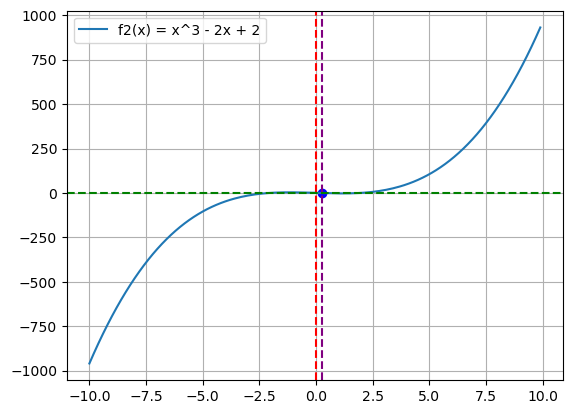

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def f2(x):
    return x**3 - 4 * x +1

def g2(x):
    return (x ** 3 + 1) / 4

def iteration_method(g, x, tol = 1e-5,max_iter = 100):
    for i in range(max_iter):
        x_new = g(x)
        if(x_new - x) < tol:
            return x_new
        x = x_new
    raise ValueError("Not convergse")

root = iteration_method(g2, 0)


x = np.arange(-10, 10, 0.1)

plt.plot(x, f2(x), label='f2(x) = x^3 - 2x + 2')
plt.scatter(root,f2(root), color='blue')
plt.axvline(root,color='purple',linestyle='--')

plt.axvline(0,color='red',linestyle='--')
plt.axhline(0,color='green',linestyle='--')

plt.grid()
plt.legend()

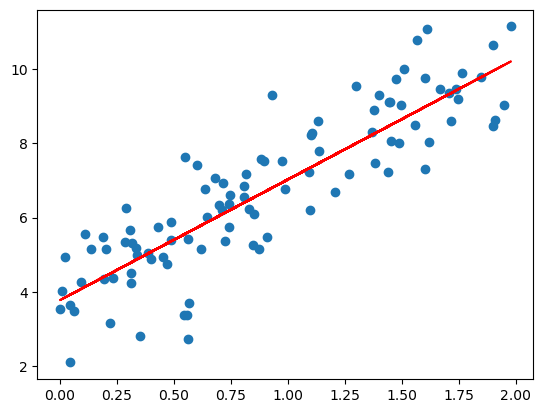

In [60]:
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

def SGD(x,y,m=0,b=0, learning_rate=0.01,epochs=10000):
    n = len(y)
    for _ in range(epochs):
       for i in range(n):  
           xi = x[i:i+1]
           yi = y[i:i+1]
           y_pred = m * xi + b
           dm = -2 * xi * (yi - y_pred)
           db = -2 * (yi - y_pred)
           m -= learning_rate * dm
           b -= learning_rate * db
    return m,b

plt.scatter(x,y)
m,b = SGD(x,y)
plt.plot(x, m * x + b, color='red')

plt.show()

In [61]:
import copy

def gaussian_elimination(N, arr):
  arr = copy.deepcopy(arr)
  for i in range(N):
    for j in range(N, -1, -1):
      arr[i][j] /= arr[i][0+i]
      
    for j in range(i+1, N):  
      for k in range(N, -1, -1):
        arr[j][k] -= arr[i][k] * arr[j][0+i]

    print_arr(arr)
    print()

  solve = [0 for j in range(N)]
  for i in range(N-1, -1, -1):
    for j in range(N):
      solve[i] = arr[i][N]
      for k in range(i+1, N):
        solve[i] -= arr[i][k] * solve[k]
    solve[i] /= arr[i][i]

  print(solve)

gaussian_elimination(N, arr)

[1.0, 0.0, 0.0, 2.0]
[0.0, 0.5, 0.0, 1.5]
[0.0, 0.0, -1.0, 1.0]

[1.0, 0.0, 0.0, 2.0]
[0.0, 1.0, 0.0, 3.0]
[0.0, 0.0, -1.0, 1.0]

[1.0, 0.0, 0.0, 2.0]
[0.0, 1.0, 0.0, 3.0]
[0.0, 0.0, 1.0, -1.0]

[2.0, 3.0, -1.0]


-0.11864744768360097
      a         b     x_new      f(x_new)   epsilon_a
0  -0.2  0.100000  0.028108  3.884850e-03  811.553175
1  -0.2  0.028108 -0.033042  3.776789e-03  185.067155
2  -0.2 -0.033042 -0.076880  2.563348e-03   57.022045
3  -0.2 -0.076880 -0.100843  1.289553e-03   23.762476
4  -0.2 -0.100843 -0.111591  5.487041e-04    9.631862
5  -0.2 -0.111591 -0.115940  2.165892e-04    3.750617
6  -0.2 -0.115940 -0.117622  8.294223e-05    1.430101
7  -0.2 -0.117622 -0.118261  3.139280e-05    0.540467
8  -0.2 -0.118261 -0.118502  1.182914e-05    0.203543
9  -0.2 -0.118502 -0.118593  4.449875e-06    0.076553
10 -0.2 -0.118593 -0.118627  1.672893e-06    0.028777
11 -0.2 -0.118627 -0.118640  6.287609e-07    0.010816
12 -0.2 -0.118640 -0.118645  2.363002e-07    0.004065
13 -0.2 -0.118645 -0.118647  8.880307e-08    0.001528
14 -0.2 -0.118647 -0.118647  3.337233e-08    0.000574


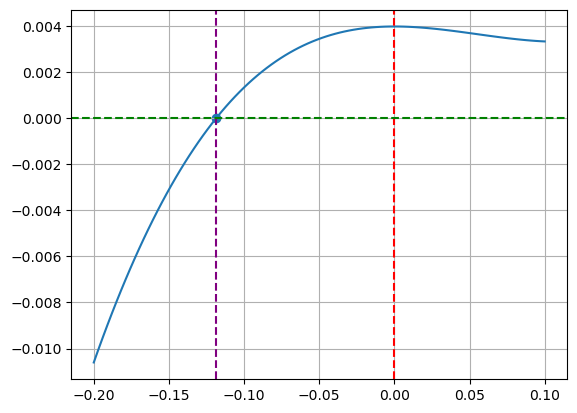

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 0.165 * x**2 + 3.993 * 10**-3

def false_position(f,a,b,tol=1e-5,max_iter=1000):
    if f(a) * f(b) >= 0:
        raise ValueError(" Must have negative")
    
    iterations = []
    x_old = a
    for i in range(max_iter):
        x_new = b - ((f(b) * (a-b)) / (f(a)-f(b)))
        if x_new != 0:
            e = ((x_new - x_old)/x_new) * 100
        else:
            e = 0

        iterations.append([a,b,x_new,f(x_new),e])

        if e < tol:
            return x_new, iterations
        if f(a) * f(x_new) < 0:
            b = x_new
        else:
            a = x_new

        x_old = x_new

    return x_new, iterations
a, b = -0.2, 0.1
tol = 0.001

root, iterations = false_position(f,a,b,tol)
print(root)

df = pd.DataFrame(iterations, columns=["a", "b", "x_new", "f(x_new)", "epsilon_a"])
print(df)


x_vals = np.linspace(a,b,100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals)
plt.scatter(root, f(root))
plt.grid()
plt.axvline(root, color='purple',linestyle="--")
plt.axvline(0, color='red',linestyle="--")
plt.axhline(0, color='green',linestyle="--")


plt.show()